# Data Cleaning & Exploration - Customer Loyalty History & Customer Flight Activity

# Import Libraries

In [175]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [176]:
# Read CSV file
loyalty = pd.read_csv('/Users/raheem-gsu/DataGripProjects/MYSQL-Tableau-Customer-Flights-Project/Datasets/Airline Loyalty Campaign Program Impact on Flights/Customer Loyalty History.csv')

activity = pd.read_csv('/Users/raheem-gsu/DataGripProjects/MYSQL-Tableau-Customer-Flights-Project/Datasets/Airline Loyalty Campaign Program Impact on Flights/Customer Flight Activity.csv')

# Initial Data Inspection

In [177]:
# Display tables
loyalty.head()

,loyalty_number,country,province,city,postal code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [178]:
activity.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [179]:
# Table information
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              12499 non-null  float64
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   2067 non-null   float64
 15  cancellation_month  2067 non-null   float64
dtypes: f

In [180]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


# Descriptive Statistics

In [181]:
# Summary statistics
loyalty.describe()

,loyalty_number,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


Year range: 2012 - 2018

In [182]:
activity.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Year Range: 2017 - 2018

# Handling Missing Values

In [183]:
# Total missing values from each field
loyalty.isnull().sum()

loyalty_number            0
country                   0
province                  0
city                      0
postal code               0
gender                    0
education                 0
salary                 4238
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64

In [184]:
activity.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

# Data Cleaning

## Customer Loyalty History

In [185]:
# Original row amount: 16737

# Drop duplicates
loyalty.drop_duplicates(inplace=True)
loyalty.shape

(16737, 16)

In [186]:
# Check enrollment and cancellation data types 
loyalty[['enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']].dtypes

enrollment_year         int64
enrollment_month        int64
cancellation_year     float64
cancellation_month    float64
dtype: object

In [187]:
# Combine enrollment_year and enrollment_month into a new DATE field named 'enrollment_date'
loyalty['enrollment_date'] = pd.to_datetime(loyalty['enrollment_year'].astype(str) + '-' + loyalty['enrollment_month'].astype(str) + '-01')
loyalty[['enrollment_year', 'enrollment_month', 'enrollment_date']]

,enrollment_year,enrollment_month,enrollment_date
0,2016,2,2016-02-01
1,2016,3,2016-03-01
2,2014,7,2014-07-01
3,2013,2,2013-02-01
4,2014,10,2014-10-01
...,...,...,...
16732,2012,12,2012-12-01
16733,2014,9,2014-09-01
16734,2014,3,2014-03-01
16735,2018,4,2018-04-01


In [188]:
# Drop enrollment_year and enrollment_month
loyalty.drop(columns = ['enrollment_year', 'enrollment_month'], inplace = True)

In [189]:
# Convert cancellation_year and cancellation_month to object (string)
loyalty['cancellation_year'] = loyalty['cancellation_year'].astype(str)
loyalty['cancellation_month'] = loyalty['cancellation_month'].astype(str)
loyalty[['cancellation_year', 'cancellation_month']]

,cancellation_year,cancellation_month
0,nan,nan
1,nan,nan
2,2018.0,1.0
3,nan,nan
4,nan,nan
...,...,...
16732,nan,nan
16733,nan,nan
16734,nan,nan
16735,nan,nan


In [190]:
# Remove decimal point from years
loyalty['cancellation_year'] = loyalty['cancellation_year'].str.replace('.0', '')
loyalty['cancellation_month'] = loyalty['cancellation_month'].str.replace('.0', '')
loyalty[['cancellation_year', 'cancellation_month']]

,cancellation_year,cancellation_month
0,nan,nan
1,nan,nan
2,2018,1
3,nan,nan
4,nan,nan
...,...,...
16732,nan,nan
16733,nan,nan
16734,nan,nan
16735,nan,nan


In [191]:
# Convert 'nan' to object NULL value None
loyalty['cancellation_year'] = loyalty['cancellation_year'].apply(lambda x: None if x == 'nan' else x)
loyalty['cancellation_month'] = loyalty['cancellation_month'].apply(lambda x: None if x == 'nan' else x)
loyalty[['cancellation_year', 'cancellation_month']]

,cancellation_year,cancellation_month
0,None,None
1,None,None
2,2018,1
3,None,None
4,None,None
...,...,...
16732,None,None
16733,None,None
16734,None,None
16735,None,None


In [192]:
# Combine cancellation_year and cancellation_month into a new DATE field named 'cancellation_date'
loyalty['cancellation_date'] = pd.to_datetime(loyalty['cancellation_year'] + '-' + loyalty['cancellation_month'] + '-01', errors='coerce')
loyalty[['cancellation_year', 'cancellation_month', 'cancellation_date']]

,cancellation_year,cancellation_month,cancellation_date
0,None,None,NaT
1,None,None,NaT
2,2018,1,2018-01-01
3,None,None,NaT
4,None,None,NaT
...,...,...,...
16732,None,None,NaT
16733,None,None,NaT
16734,None,None,NaT
16735,None,None,NaT


In [193]:
# Drop cancellation_year and cancellation_month
loyalty.drop(columns = ['cancellation_year', 'cancellation_month'], inplace = True)

In [194]:
# Verify new fields - enrollment_date & cancellation_date
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loyalty_number     16737 non-null  int64         
 1   country            16737 non-null  object        
 2   province           16737 non-null  object        
 3   city               16737 non-null  object        
 4   postal code        16737 non-null  object        
 5   gender             16737 non-null  object        
 6   education          16737 non-null  object        
 7   salary             12499 non-null  float64       
 8   marital_status     16737 non-null  object        
 9   loyalty_card       16737 non-null  object        
 10  clv                16737 non-null  float64       
 11  enrollment_type    16737 non-null  object        
 12  enrollment_date    16737 non-null  datetime64[ns]
 13  cancellation_date  2067 non-null   datetime64[ns]
dtypes: dat

## Customer Flight Activity

In [195]:
# Original row amount: 405624

# Drop duplicates
activity.drop_duplicates(inplace=True)
activity.shape

(403760, 10)

In [196]:
# Create a new DATE column called 'date' that combines the year and month fields
activity['date'] = pd.to_datetime(activity['year'].astype(str) + '-' + activity['month'].astype(str) + '-01')

In [197]:
# Verify changes
activity[['year', 'month', 'date']]

,year,month,date
0,2017,1,2017-01-01
1,2017,1,2017-01-01
2,2017,1,2017-01-01
3,2017,1,2017-01-01
4,2017,1,2017-01-01
...,...,...,...
405619,2018,12,2018-12-01
405620,2018,12,2018-12-01
405621,2018,12,2018-12-01
405622,2018,12,2018-12-01


In [198]:
# Drop year and month columns
activity.drop(columns = ['year', 'month'], inplace = True)

In [199]:
# Verify changes
activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loyalty_number               403760 non-null  int64         
 1   flights_booked               403760 non-null  int64         
 2   flights_with_companions      403760 non-null  int64         
 3   total_flights                403760 non-null  int64         
 4   distance                     403760 non-null  int64         
 5   points_accumulated           403760 non-null  float64       
 6   points_redeemed              403760 non-null  int64         
 7   dollar_cost_points_redeemed  403760 non-null  int64         
 8   date                         403760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 30.8 MB


# Exploratory Data Analysis (EDA)

## What are the enrollment types?

In [200]:
# List of enrollment types
loyalty['enrollment_type'].drop_duplicates()

0           Standard
18    2018 Promotion
Name: enrollment_type, dtype: object

The promotion occurred during the year of 2018.

## How long did the promotion last during 2018?

In [201]:
# 2018 Promotion Date Range (in months)
promotion_dates = loyalty.loc[loyalty['enrollment_type'] == '2018 Promotion', ['enrollment_date']].drop_duplicates()
promotion_dates['enrollment_date'].dt.month

18    3
36    4
69    2
Name: enrollment_date, dtype: int32

The promotion lasted from February to April

## Salary Range

In [202]:
# Calculating Range (Max - Min)
407228.000000 - -58486.000000

465714.0

In [203]:
# Bin Number
465714 / 18

25873.0

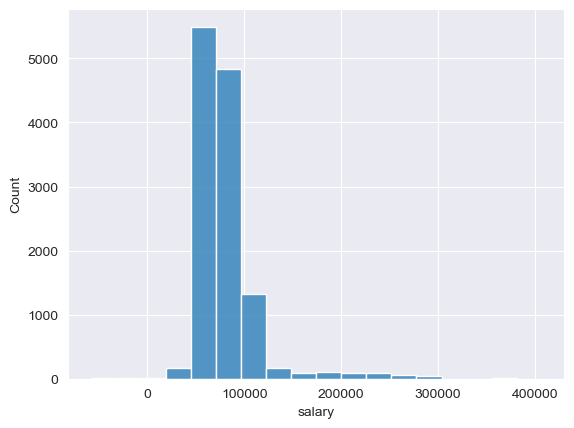

In [204]:
# Histogram for a numerical column 
# 18 for bins
# We use histogram to check for range and outliers
sns.histplot(loyalty['salary'], bins=18)
plt.show()

# Export Cleaned Dataset

In [80]:
# Export Datasets to CSV
loyalty.to_csv('customer_loyalty_history (cleaned).csv', index=False)
activity.to_csv('customer_flight_activity (cleaned).csv', index=False)